# 📘 Linear Regression

## 🔍 What Is Linear Regression?
**Linear regression** is a fundamental supervised learning algorithm for **predicting a continuous outcome** $ Y $ based on one or more input variables $ X_1, X_2, \dots, X_p $.

It models the relationship as a **linear combination of the inputs**:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \varepsilon
$$

- $ \beta_0 $: intercept
- $ \beta_1, \dots, \beta_p $: coefficients (slopes)
- $ \varepsilon $: random error

## 🧠 Intuition
- Each coefficient $ \beta_j $ tells us how much $ Y $ changes with a one-unit change in $ X_j $, holding all other variables fixed.
- The goal is to find the 'best-fitting' line/hyperplane through the data.

## 📐 Estimation via Least Squares
Given data $ \{(X_i, Y_i)\}_{i=1}^n $, we minimize the sum of squared errors:

$$
\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta}} \sum_{i=1}^n (Y_i - \beta_0 - \sum_{j=1}^p \beta_j X_{ij})^2
$$

The closed-form solution in matrix form is:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

## 🧪 Model Evaluation Metrics
- **Mean Squared Error (MSE)**: $ \frac{1}{n} \sum (Y_i - \hat{Y}_i)^2 $
- **R-squared**: proportion of variance explained by the model

## 📈 Visualization
- Scatter plot with regression line
- Residual plot (should look like random noise)

## 🔧 Step-by-step Example with Synthetic Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')

In [2]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)
data = pd.DataFrame({'X': X[:, 0], 'y': y})
data.head()

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


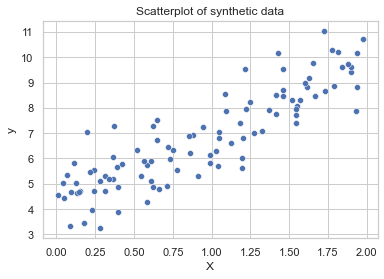

In [3]:
# Visualize
sns.scatterplot(x='X', y='y', data=data)
plt.title('Scatterplot of synthetic data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R^2:', r2)

MSE: 0.6536995137170021
R^2: 0.8072059636181392


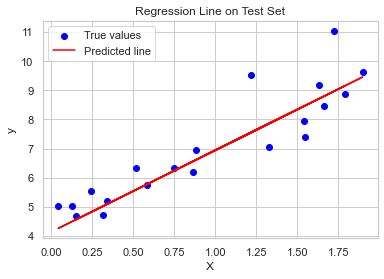

In [7]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred, color='red', label='Predicted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line on Test Set')
plt.legend()
plt.show()

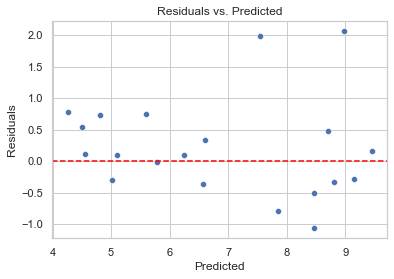

In [8]:
# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In [9]:
# Export estimated coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

Intercept: 4.142913319458566
Slope: 2.7993236574802762


## 🏠 Real Data Example: California Housing

In [3]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

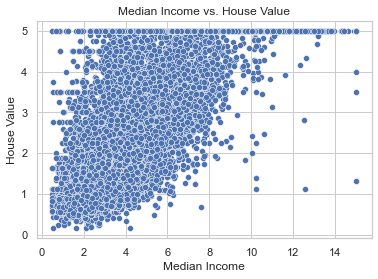

In [4]:
sns.scatterplot(x=X["MedInc"], y=y)
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs. House Value")
plt.show()


In [5]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 0.5411287478470685
R^2: 0.5910509795491354


In [13]:
# Export coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df

,Feature,Coefficient
0,MedInc,0.447600
1,HouseAge,0.009568
2,AveRooms,-0.124756
3,AveBedrms,0.794471
4,Population,-0.000001
5,AveOccup,-0.003443
6,Latitude,-0.418555
7,Longitude,-0.433405


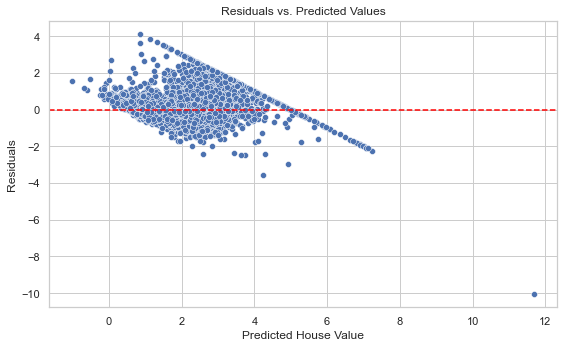

In [6]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted House Value")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.tight_layout()
plt.show()

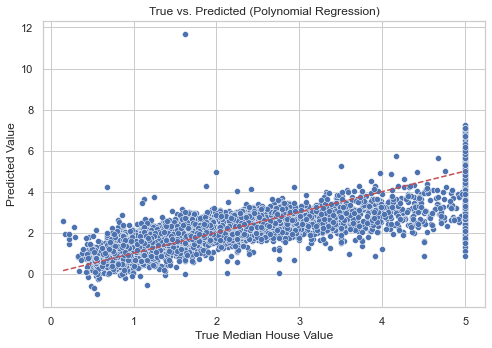

In [8]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Value")
plt.title("True vs. Predicted (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.tight_layout()
plt.show()